In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

import random
from queue import Queue
plt.style.use('ggplot')

# EX1:

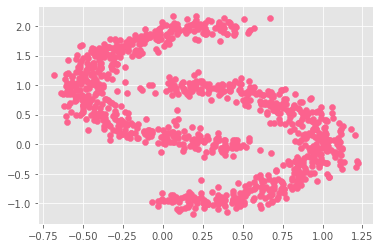

In [19]:
blobs = make_moons(1000, noise=0.1)[0]
plt.scatter(blobs[:,1], blobs[:,0], color = '#fc628e')

## Standardize data

In [20]:
for x in range(2):
    m = blobs[:,x].mean()
    s = blobs[:,x].std()
    for y in range(len(blobs)):
        blobs[y,x] = (blobs[y,x] - m)/s

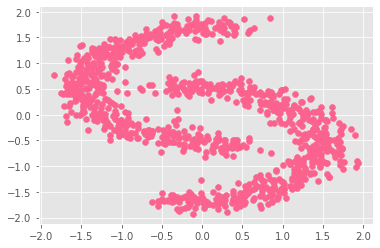

In [21]:
plt.scatter(blobs[:,1], blobs[:,0], color = '#fc628e')

In [23]:
class dbscan2():
    def __init__(self,df, epsilon=1, min_points=5):
        self.df = np.array(df)
        self.epsilon = epsilon
        self.min_points = min_points
        self.cluster_label = 0
        self.noise = 0
        
    def fit(self):
        "Fit the data"
        
        # Create labels column initialized to -1 (unclassified)
        self.df = np.append(self.df, np.array([[-1]*len(blobs)]).reshape(-1,1), axis=1)
        
        for x in range(len(self.df)):
            
            # if the point is not labled already then search for neighbors
            if self.df[x,2] != -1:
                continue
            
            # find neighbors
            p = self.df[x,:2]
            neighbors = self.rangeQuery(p)
            
            # If less neighbors than min_points then label as noise and continue
            if len(neighbors) < self.min_points:
                self.df[x,2] = self.noise
                continue
            
            # increment cluster label
            self.cluster_label += 1

            # set current row to new cluster label
            self.df[x,2] = self.cluster_label

            # create seed set to hold all neighbors of cluster including the neighbors already found
            found_neighbors = neighbors
            
            # create Queue to fold all neighbors of cluster
            q = Queue()
            
            # add original neighbors
            for x in neighbors:
                q.put(x)
            
            # While isnt empty label new neighbors to cluster
            while q.empty() == False:
                
                current = q.get()
                
                # if cur_row labled noise then change to cluster label (border point)
                if self.df[current,2] == 0:
                    self.df[current,2] = self.cluster_label

                # If label is not -1(unclassified) then continue
                if self.df[current,2] != -1:
                    continue
                
                # label the neighbor
                self.df[current,2] = self.cluster_label

                # look for neightbors of cur_row
                point = self.df[current,:2]
                neighbors2 = self.rangeQuery(point)
                
                # if neighbors2 >= min_points then add those neighbors to seed_set
                if len(neighbors2) >= self.min_points:

                    for x in neighbors2:
                        if x not in found_neighbors:
                            q.put(x)
                            found_neighbors.append(x) 

    def predict(self, x):
        "Return the predicted labels"
        
        preds = []
        
        for point in x:
            neighbors = self.rangeQuery(point)
            label = self.df[neighbors[0],2]
            preds.append(label)
        
        return preds
    
    def rangeQuery(self, x):
        """Query database against x and return all points that are <= epsilon"""
        
        neighbors = []
        
        for y in range(len(self.df)):
            q = self.df[y, :2]
            if self.dist(x, q) <= self.epsilon:
                neighbors.append(y)
        
        return neighbors
    
    def dist(self, point1, point2):
        """Euclid distance function"""
        
        x1 = point1[0]
        x2 = point2[0]
        y1 = point1[1]
        y2 = point2[1]
        
        # create the points 
        p1 = (x1 - x2)**2
        p2 = (y1 - y2)**2

        return np.sqrt(p1 + p2)

In [24]:
temp = dbscan2(blobs, 0.2, 5)
temp.fit()

In [33]:
tempdf = pd.DataFrame(temp.df)
tempdf

,0,1,2
0,1.795486,-0.501059,1.0
1,0.457536,-1.680129,1.0
2,0.372112,0.855623,2.0
3,-1.697353,0.061858,2.0
4,0.889464,-1.116434,1.0
...,...,...,...
995,-0.655663,-0.221390,1.0
996,0.457721,0.820969,2.0
997,-0.459227,0.584357,1.0
998,-0.489180,1.635091,2.0


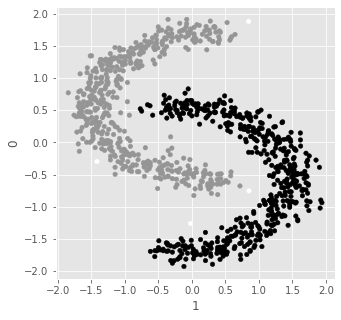

In [34]:
tempdf.plot(x=1, y=0, kind="scatter", c=2, colorbar=False, figsize = (5,5))
plt.show()

#EX2:

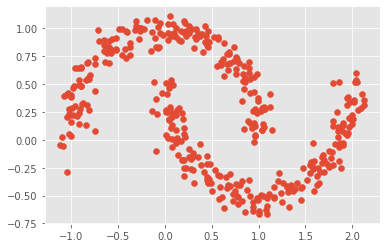

In [42]:
X, y = make_moons(400, noise=.08, random_state = 42)
#plt.scatter(X[:, 0], X[:, 1] #c= y)
plt.scatter(X[:, 0], X[:, 1])

In [44]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [59]:
def dbscan(eps, min_samples):
  db = DBSCAN(eps=eps, min_samples=min_samples).fit(Xstd)
  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_

  # Number of clusters in labels, ignoring noise if present.
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_noise_ = list(labels).count(-1)
  print(n_clusters_, n_noise_)
  return n_clusters_, n_noise_, labels

In [60]:
def plot_dbscan(X, labels):
  # Black removed and is used for noise instead.
  unique_labels = set(labels)
  colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
  for k, col in zip(unique_labels, colors):
      if k == -1:
          # Black used for noise.
          col = [0, 0, 0, 1]

      class_member_mask = labels == k

      xy = X[class_member_mask & core_samples_mask]
      plt.plot(
          xy[:, 0],
          xy[:, 1],
          "o",
          markerfacecolor=tuple(col),
          markeredgecolor="k",
          markersize=14,
      )

      xy = X[class_member_mask & ~core_samples_mask]
      plt.plot(
          xy[:, 0],
          xy[:, 1],
          "o",
          markerfacecolor=tuple(col),
          markeredgecolor="k",
          markersize=6,
      )

  plt.title("Estimated number of clusters: %d" % n_clusters_)
  plt.show()

2 5


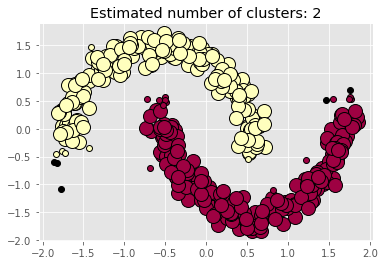

In [61]:
n_clusters_, n_noise_, labels = dbscan(eps=0.3, min_samples = 10)
plot_dbscan(X_std, labels)

0 400


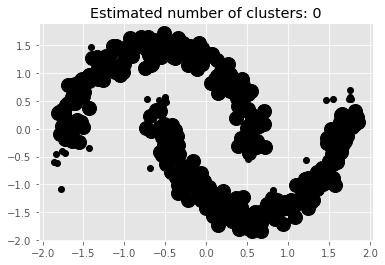

2 1


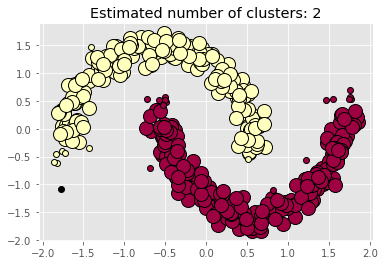

1 0


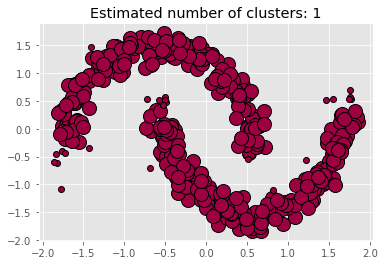

1 0


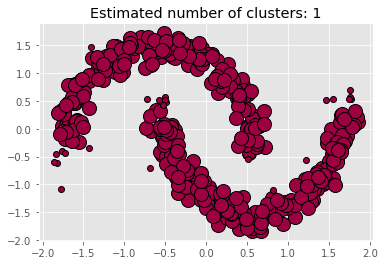

In [62]:
for e in [0.04, 0.4, 4, 40]:
  n_clusters_, n_noise_, labels= dbscan(eps=e, min_samples = 10)
  plot_dbscan(Xstd, labels)

3 0


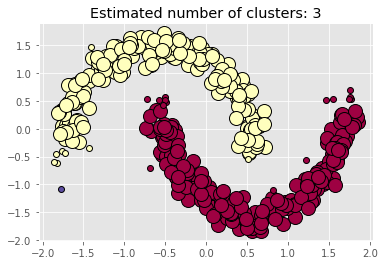

2 1


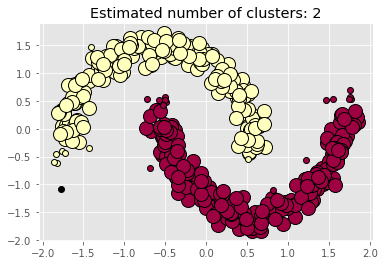

2 1


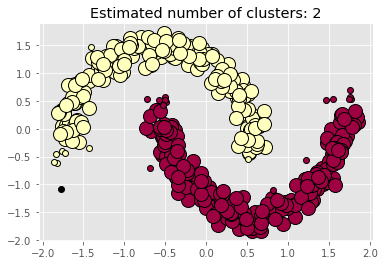

2 1


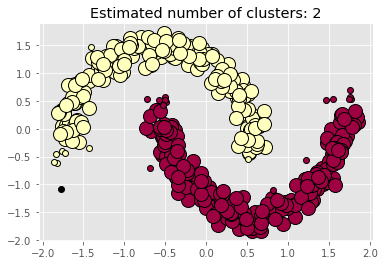

2 4


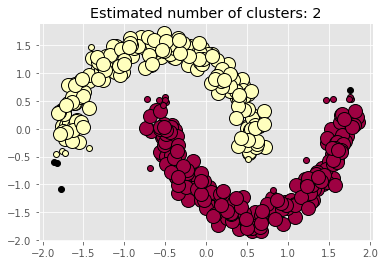

2 122


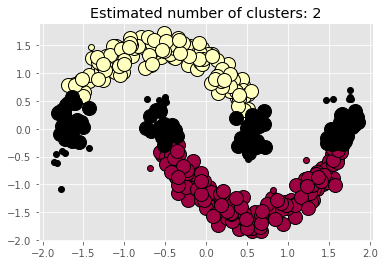

In [63]:
for m in [1,4, 5, 10, 20, 30]:
  n_clusters_, n_noise_, labels= dbscan(eps=0.4, min_samples = m)
  plot_dbscan(Xstd, labels)